# Física Aplicada à Computação

## Projeto Epoca de Finalistas

### Licenciatura em Engenharia Informática - Ano Lectivo 2022-2023

#### Fábio Gonçalves - 17646

#### João Portelinha - 20481

#### Docente: Nuno Pereira

##### Arduinos Nano 33 BLE Sense

Neste relatorio iremos apresentar as soluções para o Projeto de Epoca de Finalistas que nos foi proposto pelo docente da cadeira de Física Aplicada a Computação.

Os objetivos deste projeto eram os seguintes:
- Gerar dados de todos os sensores em ambos os Arduinos;
- Ler esses mesmos dados em Python;
- Calcular médias, desvio padrão, maximos e minimos;
- Visualizar em graficos usando o matplotlib;
- Gravar os dados num ficheiro em formato .json;
- Enviar esse mesmo ficheiro um para o outro por email atraves de Python;
- Apresentar os graficos numa pagina web.


### Importante
Começar por correr este bloco de codigo que irá iniciar os imports necessarios para o resto do relatorio e realizar a ligação ao arduino!

Necessario executar os seguintes comandos de instação de algumas *libraries*:
- pip install pyserial
- pip install matplotlib
- pip install numpy

In [1]:
import os
import serial
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import json
import mimetypes
import smtplib
import getpass
import time
from datetime import datetime
from email.message import EmailMessage

port = !python -m serial.tools.list_ports
print('Portas COM disponível:', port)
if (port[0] != "no ports found"):
      arduino = serial.Serial()
      arduino.port = 'COM5'
      arduino.baudrate = 9600
      arduino.timeout = 5
      print("Ligação ao Arduino Estabelecida na", arduino.port)  
else:
       print("Erro ao estabelecer ligação com o Arduino")


Portas COM disponível: ['COM1                ', 'COM5                ', '2 ports found']
Ligação ao Arduino Estabelecida na COM5


#### Aquisição de Dados

In [2]:
iterations = int(input('Número de séries de aquisição: '))
#iterations = 200

arduino.open()
#arduino.write(bytes([1]))

data = []
data.append("Hora Temperatura(°C) Humidade(%) Pressão(kPa) Proximidade Aceleração(G) Temperatura Efetiva Temperatura na Pele")
count = 0

print('A adquirir os dados...')

task = True

#time_start = time.time()

while task:
    
    line = str(arduino.readline())
    reading = line[2:-5]

    now = datetime.now()
    current_time = now.strftime("%H:%M")

    data.append(current_time + " " + reading)
    count +=1
    #time.sleep(60) # TODO - Meter o delay no codigo do arduino
    if (count == iterations):
        print("\nDados obtidos com sucesso.".format(iterations))
        task = False

#time_end = time.time()
arduino.close()

A adquirir os dados...

Dados obtidos com sucesso.


#### Manipulação dos Dados e Desenho dos Respetivos Gráficos
Nesta parte do trabalho, separamos os dados todos lidos do arduino para os seus *arrays* individuais, estes que iremos usar para o desenho dos gráficos.

Dados lidos com sucesso!


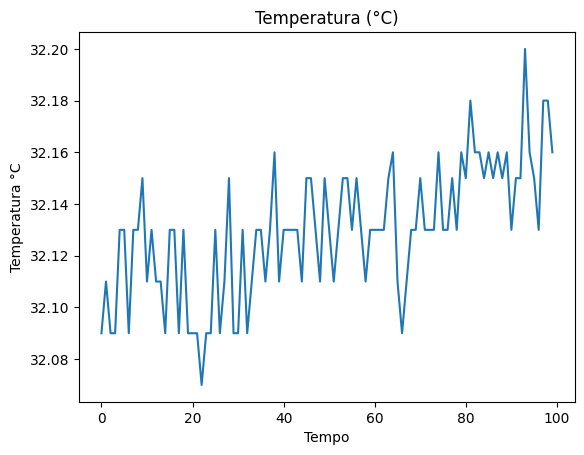

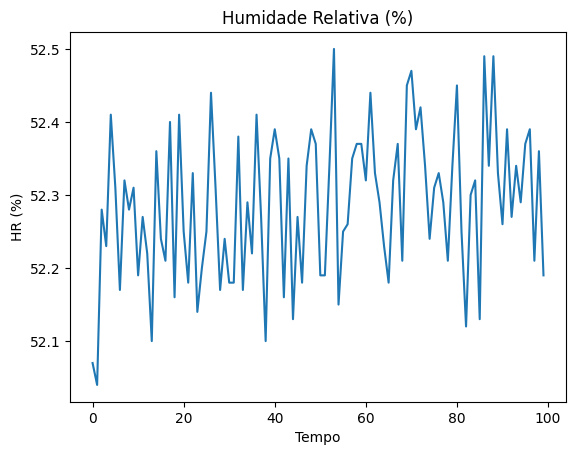

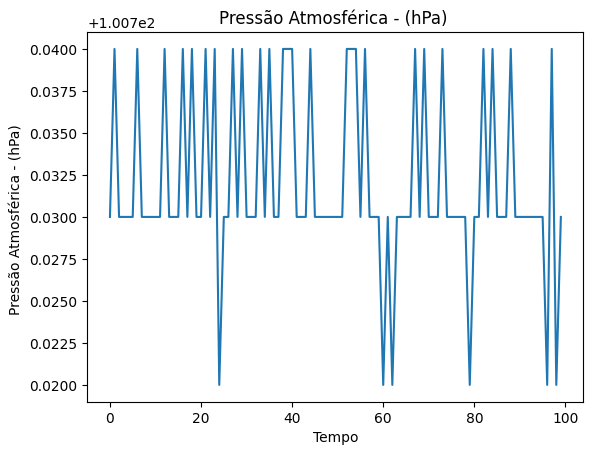

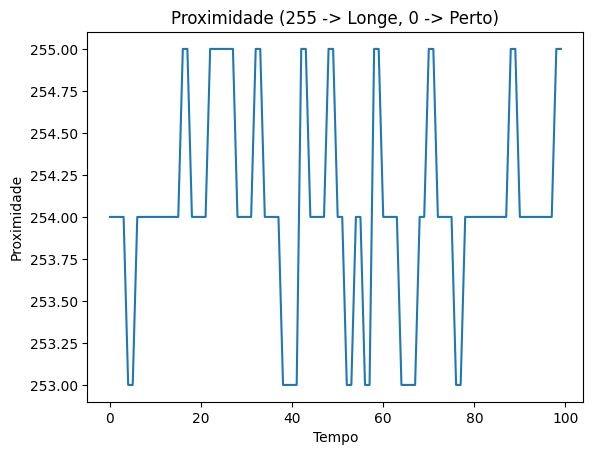

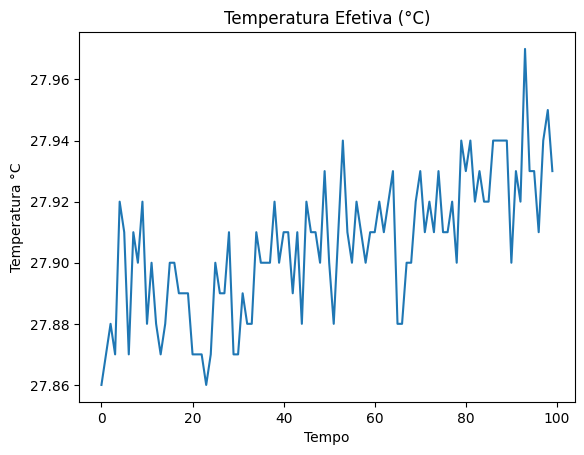

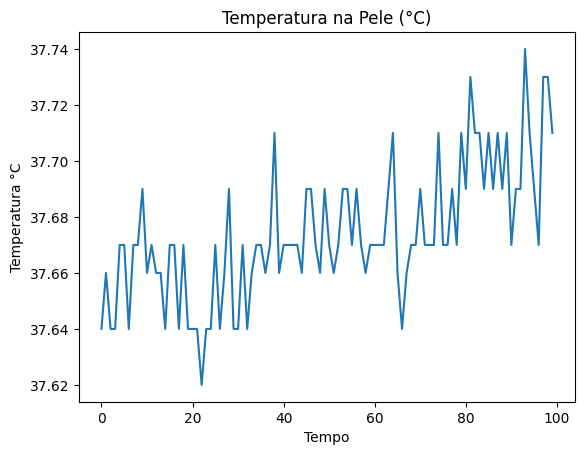

Text(0, 0.5, 'Acelearacao em Z')

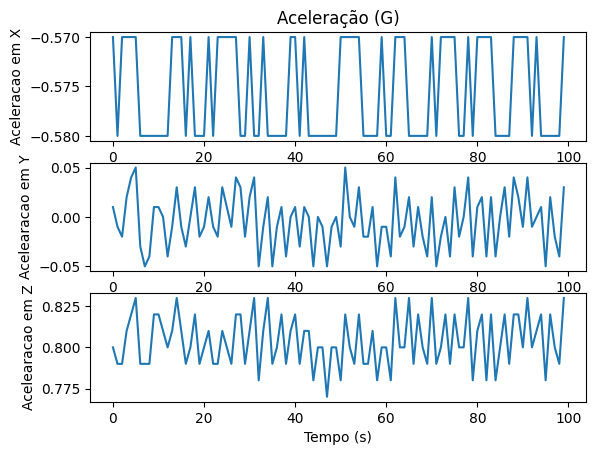

In [3]:
time_data = []
temp_data = []
hr_data = []
p_data  = []
prox_data = []
acc_data = []
x_acc = []
y_acc = []
z_acc = []
eff_temp = []
skin_temp = []

data = data[1:] # Skip primeira linha

for line in data:
    time, temp, hr, p, prox, acc, et, st = line.split()
    time_data.append(time)
    temp_data.append(float(temp))
    hr_data.append(float(hr))
    p_data.append(float(p))
    prox_data.append(float(prox))
    acc_data.append(acc)
    acc_string = acc.split(",")
    x_acc.append(float(acc_string[0]))
    y_acc.append(float(acc_string[1]))
    z_acc.append(float(acc_string[2]))
    eff_temp.append(float(et))
    skin_temp.append(float(st))

print("Dados lidos com sucesso!")

# Grafico da temperatura
plt.title('Temperatura (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(temp_data)
plt.show()

# Grafico da humidade
plt.title('Humidade Relativa (%)')
plt.xlabel("Tempo")
plt.ylabel("HR (%)")
plt.plot(hr_data)
plt.show()

# Grafico da Pressão Atmosferica
plt.title('Pressão Atmosférica - (hPa) ')
plt.xlabel("Tempo")
plt.ylabel("Pressão Atmosférica - (hPa) ")
plt.plot(p_data)
plt.show()

# Grafico de Proximidade
plt.title('Proximidade (255 -> Longe, 0 -> Perto)')
plt.xlabel("Tempo")
plt.ylabel("Proximidade")
plt.plot(prox_data)
plt.show()

# Grafico da temperatura efetiva
plt.title('Temperatura Efetiva (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(eff_temp)
plt.show()

# Grafico da temperatura na pele
plt.title('Temperatura na Pele (°C)')
plt.xlabel("Tempo")
plt.ylabel("Temperatura °C")
plt.plot(skin_temp)
plt.show()

# Grafico de Aceleração
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(x_acc)
plt.title('Aceleração (G)')
plt.ylabel('Aceleracao em X')

plt.subplot(3, 1, 2)
plt.plot(y_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Y')

plt.subplot(3, 1, 3)
plt.plot(z_acc)
plt.xlabel('Tempo (s)')
plt.ylabel('Acelearacao em Z')


#### Calculos das Grandezas Basicas

In [4]:
# Calculo para as Grandezas da Temperatura
print("Grandezas Básicas de Temperatura")
print("Máximo = ", np.max(temp_data))
print("Mínimo = ", np.min(temp_data))
print("Média = ", np.average(temp_data))
print("Mediana = ", np.median(temp_data))
print("Desv. Padrão = ", np.std(temp_data), "\n")


# Calculo para as Grandezas de HR
print("Grandezas Básicas de HR(%)")
print("Máximo = ", np.max(hr_data))
print("Mínimo = ", np.min(hr_data))
print("Média = ", np.average(hr_data))
print("Mediana = ", np.median(hr_data))
print("Desv. Padrão = ", np.std(hr_data), "\n")

# Calculo para as Grandezas de P
print("Grandezas Básicas de P(hPa)")
print("Máximo = ", np.max(p_data))
print("Mínimo = ", np.min(p_data))
print("Média = ", np.average(p_data))
print("Mediana = ", np.median(p_data))
print("Desv. Padrão = ", np.std(p_data), "\n")

# Calculo para as Grandezas da Temperatura Efetiva
print("Grandezas Básicas de Temperatura Efetiva")
print("Máximo = ", np.max(eff_temp))
print("Mínimo = ", np.min(eff_temp))
print("Média = ", np.average(eff_temp))
print("Mediana = ", np.median(eff_temp))
print("Desv. Padrão = ", np.std(eff_temp), "\n")

# Calculo para as Grandezas na Pele
print("Grandezas Básicas de Temperatura na Pele")
print("Máximo = ", np.max(skin_temp))
print("Mínimo = ", np.min(skin_temp))
print("Média = ", np.average(skin_temp))
print("Mediana = ", np.median(skin_temp))
print("Desv. Padrão = ", np.std(skin_temp), "\n")

Grandezas Básicas de Temperatura
Máximo =  32.2
Mínimo =  32.07
Média =  32.12929999999999
Mediana =  32.13
Desv. Padrão =  0.025347780967965042 

Grandezas Básicas de HR(%)
Máximo =  52.5
Mínimo =  52.04
Média =  52.28709999999999
Mediana =  52.29
Desv. Padrão =  0.10079975198382192 

Grandezas Básicas de P(hPa)
Máximo =  100.74
Mínimo =  100.72
Média =  100.73199999999999
Mediana =  100.73
Desv. Padrão =  0.005291502622126303 

Grandezas Básicas de Temperatura Efetiva
Máximo =  27.97
Mínimo =  27.86
Média =  27.905699999999996
Mediana =  27.91
Desv. Padrão =  0.022461300051422026 

Grandezas Básicas de Temperatura na Pele
Máximo =  37.74
Mínimo =  37.62
Média =  37.67380000000001
Mediana =  37.67
Desv. Padrão =  0.023949112718428436 



#### Criação do ficheiro .JSON

In [11]:
# Define the output file path
dir_path = os.getcwd()
file_path = os.path.join(dir_path, 'output.json')

# Extracting the categories from the first row
categories = [
    'tempo',
    'temperatura',
    'humidade',
    'pressao',
    'proximidade',
    'acel_x',
    'acel_y',
    'acel_z',
    'temperatura_efetiva',
    'temperatura_na_pele'
]

# Initialize a dictionary to store the categorized data
categorized_data = {category: [] for category in categories}

categorized_data[categories[0]].extend(time_data)
categorized_data[categories[1]].extend(temp_data)
categorized_data[categories[2]].extend(hr_data)
categorized_data[categories[3]].extend(p_data)
categorized_data[categories[4]].extend(prox_data)
categorized_data[categories[5]].extend(x_acc)
categorized_data[categories[6]].extend(y_acc)
categorized_data[categories[7]].extend(z_acc)
categorized_data[categories[8]].extend(eff_temp)
categorized_data[categories[9]].extend(skin_temp)

# Get the current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Create a dictionary to combine date-time and categorized data
combined_data = {"timestamp": current_datetime, **categorized_data}

# Define the output file path
output_file_path = "output.json"

# Write the categorized data to the file
with open(output_file_path, 'w') as file:
    json.dump(combined_data, file, indent=2)

#### Criação e envio do email contendo o ficheiro .JSON em anexo

In [6]:
message = EmailMessage()
sender = "20481@stu.ipbeja.pt"
recipient = "17646@stu.ipbeja.pt"
message['From'] = sender
message['To'] = recipient
message['Subject'] = 'Dados Arduino do João'
body = "Ficheiro em anexo .json com dados do Arduino"
message.set_content(body)

attachment_path = file_path
attachment_filename = os.path.basename(attachment_path)

mime_type, _ = mimetypes.guess_type(attachment_path)
mime_type, mime_subtype = mime_type.split('/', 1)

with open(attachment_path, 'rb') as ap:
    message.add_attachment(ap.read(),
                           maintype=mime_type,
                           subtype=mime_subtype,
                           filename=attachment_filename)

smtp_server = 'smtp.office365.com'
smtp_port = 587
password = getpass.getpass('Password? ')

with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(sender, password)
    server.send_message(message)